In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM
import utils.dslab as dslab

# Parâmetros iniciais

In [42]:
n1 = 1.5
n2 = 1.499
n3 = n2
n4 = n2
n5 = n2

p2 = (n1/n2)**2
p3 = (n1/n3)**2
p4 = (n1/n4)**2
p5 = (n1/n5)**2

a = 5e-6
b = 10e-6

numOfPoints = 1000

lambda_min = 0.5e-6
lambda_max = 2.0e-6

k0 = 2*np.pi/lambda_min

## Parâmetros modais

In [43]:
kx = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
ky = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
gamma_2 = SM.sqrt(k0**2*(n1**2-n2**2)-kx**2)
gamma_3 = SM.sqrt(k0**2*(n1**2-n3**2)-kx**2)
gamma_4 = SM.sqrt(k0**2*(n1**2-n4**2)-ky**2)
gamma_5 = SM.sqrt(k0**2*(n1**2-n5**2)-ky**2)

In [44]:
# Ex_nm modes
kySol = dslab.mercatilli(n1, n4, n5, lambda_min, b, 'TE', 'none', 0.1)
kxSol = dslab.mercatilli(n1, n2, n3, lambda_min, a, 'TM', 'none', 0.5)

In [45]:
f1 = np.tan(ky*b)
f1 = f1 - ky*(gamma_4+gamma_5)/(ky**2 - gamma_4*gamma_5)
f1[:-1][np.diff(f1) > 5] = np.nan

f2 = np.tan(kx*a)
f2 = f2 - kx*(gamma_2*p2 + gamma_3*p3)/(kx**2 - p2*p3*gamma_2*gamma_3)
f2[:-1][np.diff(f2) > 5] = np.nan

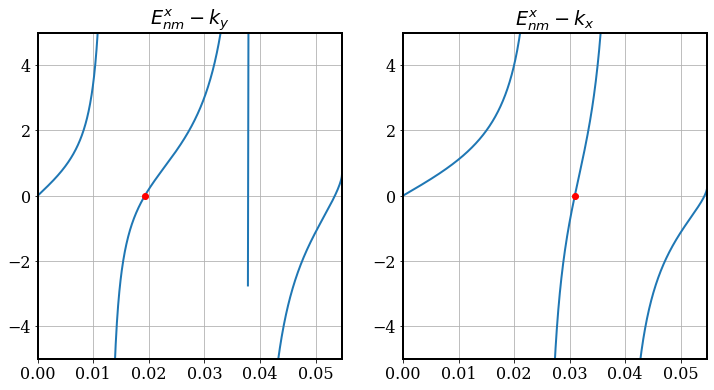

In [46]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1, axs1 = plt.subplots(1,2,figsize=(12,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs1[0].plot(ky/k0, f1, linewidth = 2)
axs1[0].plot(kySol/k0, np.zeros(np.size(kySol)), 'ro')
axs1[0].set_ylim([-5,5])
axs1[0].set_xlim([0, SM.sqrt(n1**2-n2**2)])
axs1[0].set_title(r'$E^x_{nm} - k_y$')
axs1[0].grid(True)

axs1[1].plot(kx/k0, f2, linewidth = 2)
axs1[1].plot(kxSol/k0, np.zeros(np.size(kxSol)), 'ro')
axs1[1].set_ylim([-5,5])
axs1[1].set_xlim([0, SM.sqrt(n1**2-n2**2)])
axs1[1].set_title(r'$E^x_{nm} - k_x$')
axs1[1].grid(True)

## Constante de propagação normalizada versus freq. normalizada

In [47]:
lmbd = np.linspace(lambda_min, lambda_max, numOfPoints)
k0 = 2*np.pi/lmbd
Vv = k0 * np.min(np.array([a, b])) * np.sqrt(n1**2-dslab.find_nearest(np.array([n2, n3, n4, n5])**2, n1))
kySol = dslab.mercatilli(n1, n4, n5, lmbd, b, 'TE', 0, 0.1)
kxSol = dslab.mercatilli(n1, n2, n3, lmbd, a, 'TM', 0, 0.5)

beta = np.sqrt((k0*n1)**2-kxSol**2-kySol**2)
bn = ((beta/k0)**2-n2**2)/(n1**2 - n2**2)

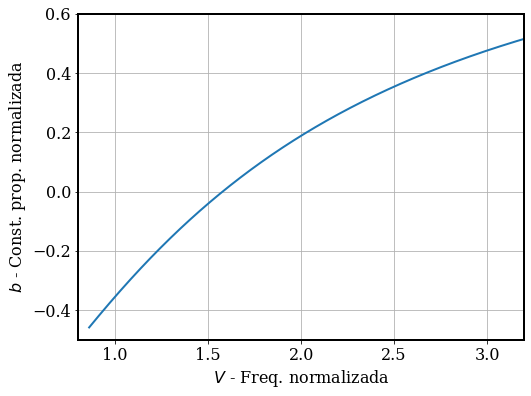

In [48]:
fig2 = plt.figure(figsize=(8,6))
plt.plot(Vv, bn, linewidth = 2)
plt.plot()
plt.xlabel('$V$ - Freq. normalizada')
plt.ylabel('$b$ - Const. prop. normalizada')
plt.xlim([0.8,3.2])
plt.ylim([-0.5,0.6])
plt.grid(True)

## Electrical field

In [49]:
idxSol  = 0
gamma_2 = SM.sqrt(k0[idxSol]**2*(n1**2-n2**2)-kxSol[idxSol]**2)
gamma_3 = SM.sqrt(k0[idxSol]**2*(n1**2-n3**2)-kxSol[idxSol]**2)
gamma_4 = SM.sqrt(k0[idxSol]**2*(n1**2-n4**2)-kySol[idxSol]**2)
gamma_5 = SM.sqrt(k0[idxSol]**2*(n1**2-n5**2)-kySol[idxSol]**2)

phix = np.arctan(-kxSol[idxSol]/(p3*gamma_3))
phiy = np.arctan(-gamma_5/kySol[idxSol])

Text(0.5, 0.5, 'y')

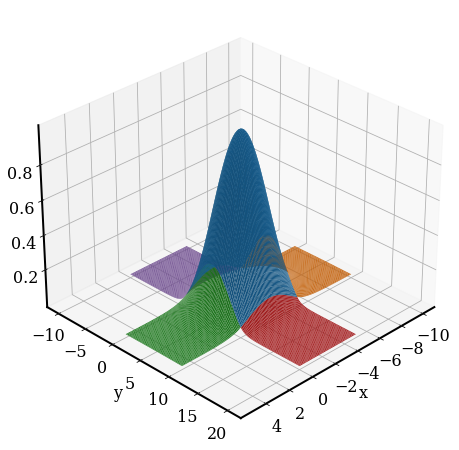

In [50]:
fig3, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (8,8))

A1 = 1
A2 = np.sin(-kxSol[idxSol] * a + phix )
A3 = np.sin(phix)
A4 = p4 * np.cos(kySol[idxSol] * b + phiy)
A5 = p5 * np.cos(phiy)

x = np.linspace(-a, 0, 100)
y = np.linspace( 0, b, 100)
X,Y = np.meshgrid(x, y)
Z1  = A1 * np.sin(kxSol[idxSol] * X + phix) * np.cos(kySol[idxSol] * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z1*np.conjugate(Z1))

x   = np.linspace(-2*a, -a, 100)
X,Y = np.meshgrid(x, y)
Z2  = A2 * np.exp(gamma_2 * (X + a)) * np.cos(kySol[idxSol] * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z2*np.conjugate(Z2))

x   = np.linspace(0, a, 100)
X,Y = np.meshgrid(x, y)
Z3  = A3 * np.exp(-gamma_3 * X) * np.cos(kySol[idxSol] * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z3*np.conjugate(Z3))

x = np.linspace(-a, 0, 100)
y = np.linspace(b, 2*b, 500)
X, Y = np.meshgrid(x, y)
Z4 = A4 * np.exp(-gamma_4 * (Y - b)) * np.sin(kxSol[idxSol] * X + phix)
ax.plot_surface(1e6*X, 1e6*Y, Z4*np.conjugate(Z4))

y = np.linspace(-b, 0, 500)
X, Y = np.meshgrid(x, y)
Z5 = A5 * np.exp(gamma_5 * Y) * np.sin( kxSol[idxSol] * X + phix)
ax.plot_surface(1e6*X, 1e6*Y, Z5*np.conjugate(Z5))

ax.view_init(30,45)
ax.set_xlabel('x')
ax.set_ylabel('y')